#### Análisis exploratorio de datos

Se crean las librerias necesarias

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

Se verifica el contenido de los datos y sus tipos

In [2]:
df01 = pd.read_csv('../Datasets/project_sql_result_01.csv')
df04 = pd.read_csv('../Datasets/project_sql_result_04.csv')
df07 = pd.read_csv('../Datasets/project_sql_result_07.csv')
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
df04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
print(df07.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


La columna start_ts esta como object aunque es de fecha, pero no se va a cambiar el tipo de dato ya que para sacar la hipótesis solicitada no es necesario ese campo.

In [9]:
df01.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [10]:
df04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
df07.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Se revisan nulos

In [6]:
print(df01.isna().sum())
print()
print(df04.isna().sum())
print()
print(df07.isna().sum())

company_name    0
trips_amount    0
dtype: int64

dropoff_location_name    0
average_trips            0
dtype: int64

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


Se consulta si hay duplicados

In [10]:
print(df01.duplicated().sum())
print()
print(df04.duplicated().sum())
print()
print(df07.duplicated().sum())

0

0

197


Se confirman duplicados en df07, se analizaran y revisará si se pueden eliminar.

In [12]:
df07 = df07.sort_values(by=['start_ts', 'duration_seconds'])

df07.head(50)

,start_ts,weather_conditions,duration_seconds
791,2017-11-04 04:00:00,Good,1260.0
938,2017-11-04 04:00:00,Good,1341.0
565,2017-11-04 04:00:00,Good,1440.0
741,2017-11-04 04:00:00,Good,1595.0
874,2017-11-04 05:00:00,Good,1018.0
462,2017-11-04 05:00:00,Good,1200.0
541,2017-11-04 05:00:00,Good,1200.0
235,2017-11-04 05:00:00,Good,1217.0
80,2017-11-04 05:00:00,Good,1260.0
357,2017-11-04 05:00:00,Good,1320.0


Se confirma que si existen registros duplicados, se procede a eliminarlos y confirmar que se hayan eliminado

In [14]:
df07.drop_duplicates(inplace=True)
df07.duplicated().sum()

np.int64(0)

Continuando con el análisis de datos, para el archivo guardado en df04, se confirma e identifica que los campos estén ordenados seleccionando a los 10 principales barrios en terminos de finalización del recorrido.

In [11]:
df04.sort_values(by=['average_trips'], ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Se realiza lo mismo para df01 y las 10 principales compañias de taxi

<div class="alert alert-block alert-info">
<b>Se genera el top 10 de las empresas de taxi.</b> <a class="tocSkip"></a>

In [19]:
df01 = df01.sort_values(by=['trips_amount'], ascending=False).head(10)
df01

,company_name,trips_amount
1,Taxi Affiliation Services,11422
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
7,Sun Taxi,7701
8,Star North Management LLC,7455
13,Nova Taxi Affiliation Llc,3175
14,Patriot Taxi Dba Peace Taxi Associat,2235
25,Top Cab Affiliation,978
27,Service Taxi Association,402
30,Setare Inc,230


Se realizaran gráficos para visualizar mejor la información.

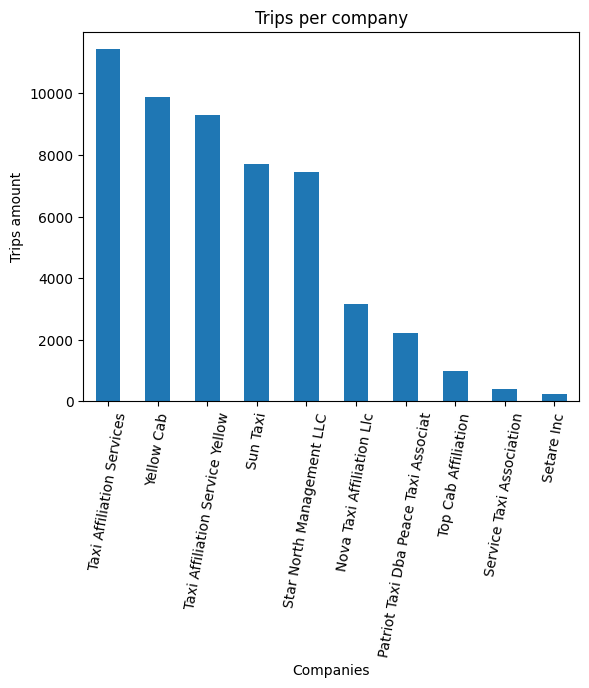

In [22]:
df01.plot(
    x='company_name',
    y='trips_amount',
    kind='bar',
    title='Trips per company',
    xlabel='Companies',
    ylabel='Trips amount',
    legend=False,
    rot=80
)
plt.show()

El servicio de taxis está acaparado por un numero limitado de compañias, puede ser por el buen servicio y rapidez con que se ofrezca.

Ahora veamos los destinos:

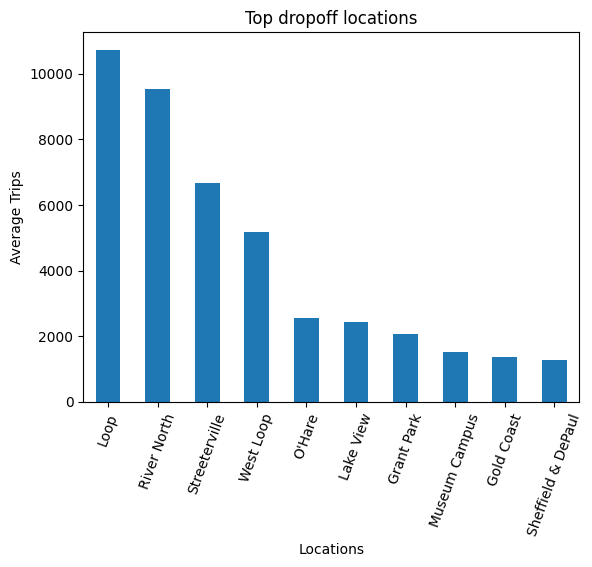

In [21]:
df04.head(10).plot(
    x='dropoff_location_name',
    y='average_trips',
    kind='bar',
    title='Top dropoff locations',
    xlabel='Locations',
    ylabel='Average Trips',
    legend=False,
    rot=70
)
plt.show()

Se puede apreciar que la mayoria de los que solicitan viaje estan en Loop, River North, Streetville, y West Loop

En conclusión se puede suponer que la compañia Flash Cab es la compañia de taxis principal que hace mas viajes a Loop y River North, y muy posiblemente a las demás ubicaciones principales.

### Paso 5. Prueba de hipótesis

Se probara la siguiente hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Se definen las hipótesis:
   
    H0: La duración promedio de los viajes en sábados lluviosos son iguales.
    HA: La duración promedio de los viajes en sábados lluviosos son diferentes.

    
Se evaluara este test con un nivel de significancia $\alpha = 0.05$

Para una mejor revisión, obtenemos el listado de los viajes realizados los días lluviosos, en este caso los marcados como 'Bad'

In [23]:
df07_rain = df07[df07['weather_conditions']=='Bad']
df07_rain = df07_rain['duration_seconds']
df07_rain

491    2280.0
998    2340.0
993    2580.0
356    2618.0
285    2620.0
        ...  
495    2940.0
852    3120.0
533    3240.0
532    2133.0
672    3022.0
Name: duration_seconds, Length: 136, dtype: float64

Realizamos la prueba de hipótesis.

In [24]:

# Usamos df_rain que contiene el valor promedio de los viajes en días lluviosos
df_rain = df07_rain.mean()

# Establecemos el valor alpha en 0.05
alpha = .05 

# realizar una prueba
results = st.ttest_1samp(
    df07_rain, 
    df_rain)

# imprimir el valor p resultante
print('valor p: ', results.pvalue)

# comparar el valor p con el umbral
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula, los tiempos promedio son diferentes")
else:
    print("No podemos rechazar la hipótesis nula, los tiempos promedio son iguales")

valor p:  1.0
No podemos rechazar la hipótesis nula, los tiempos promedio son iguales


### Conclusiones

De acuerdo al resultado no se puede rechazar la hipótesis ya que nos dice que el promedio de viaje en días lluviosos siempre es igual.

# Conclusión General:

De acuerdo al análisis realizado podemos observar que las empresas Taxi Affiliation Services, su subsidiaria Taxi Affiliation Services Yellow y Yellow Cab son por mucho las compañias preferidas de las personas ubicadas en Loop, River North y Streeterville ya que son las compañias con mas viajes finalizados a las ubicaciones antes mencionadas.

En la prueba de hipótesis se confirmó que los sábados lluviosos el viaje de Loop hasta el Aeropuerto O'Hare siempre es igual.